In [1]:
# Import required libraries
import math
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [17]:
# read in the data using the yahoo finance API
name = (input("Enter ticker of your choice"))
data = yf.download(name)

Enter ticker of your choice aapl


[*********************100%***********************]  1 of 1 completed


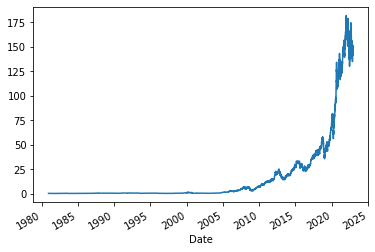

In [18]:
# Plot the daily close price chart of Apple.

close = data['Close'].plot();
close

# Save the figure.
plt.savefig("./Images/close.jpg")


# Standard Deviation

Standard deviation measures how widely returns are dispersed from the average return. It’s the most common (and biased) estimator of volatility.

In [4]:
def standard_deviation(price_data, window=30, trading_periods=252, clean=True):

    log_return = (price_data["Close"] / price_data["Close"].shift(1)).apply(np.log)

    result = log_return.rolling(window=window, center=False).std() * math.sqrt(
        trading_periods
    )

    if clean:
        return result.dropna()
    else:
        return result

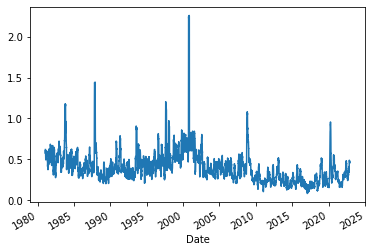

In [5]:
# plot
std = standard_deviation(data).plot();
std

# Save the figure.
plt.savefig("./Images/std.jpg")

# Parkinson

Parkinson’s volatility uses the stock’s high and low price of the day rather than just close to close prices. It’s useful to capture large price movements during the day.

In [6]:
def parkinson(price_data, window=30, trading_periods=252, clean=True):

    rs = (1.0 / (4.0 * math.log(2.0))) * (
        (price_data["High"] / price_data["Low"]).apply(np.log)
    ) ** 2.0

    def f(v):
        return (trading_periods * v.mean()) ** 0.5

    result = rs.rolling(window=window, center=False).apply(func=f)

    if clean:
        return result.dropna()
    else:
        return result

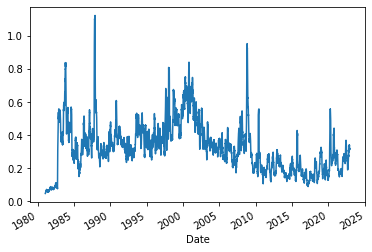

In [7]:
# plot
parkinson = parkinson(data).plot();
parkinson

# Save the figure.
plt.savefig("./Images/parkinson.jpg")

# Garman-Klass

Garman-Klass volatility extends Parkinson’s volatility by taking into account the opening and closing price. As markets are most active during the opening and closing of a trading session, it makes volatility estimation more accurate.

In [8]:
def garman_klass(price_data, window=30, trading_periods=252, clean=True):

    log_hl = (price_data["High"] / price_data["Low"]).apply(np.log)
    log_co = (price_data["Close"] / price_data["Open"]).apply(np.log)

    rs = 0.5 * log_hl ** 2 - (2 * math.log(2) - 1) * log_co ** 2

    def f(v):
        return (trading_periods * v.mean()) ** 0.5

    result = rs.rolling(window=window, center=False).apply(func=f)

    if clean:
        return result.dropna()
    else:
        return result

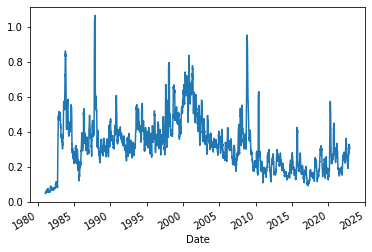

In [9]:
# Plot
gk = garman_klass(data).plot();
gk

# Save the figure.
plt.savefig("./Images/gk.jpg")

# Hodges-Tompkins

Hodges-Tompkins volatility is a bias correction for estimation using an overlapping data sample that produces unbiased estimates and a substantial gain in efficiency.

In [10]:
def hodges_tompkins(price_data, window=30, trading_periods=252, clean=True):

    log_return = (price_data["Close"] / price_data["Close"].shift(1)).apply(np.log)

    vol = log_return.rolling(window=window, center=False).std() * math.sqrt(
        trading_periods
    )

    h = window
    n = (log_return.count() - h) + 1

    adj_factor = 1.0 / (1.0 - (h / n) + ((h ** 2 - 1) / (3 * n ** 2)))

    result = vol * adj_factor

    if clean:
        return result.dropna()
    else:
        return

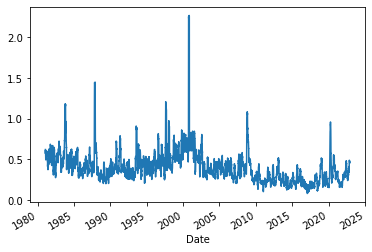

In [11]:
# plot
ht = hodges_tompkins(data).plot();
ht

# Save the figure.
plt.savefig("./Images/ht.jpg")

# Rogers-Satchell

Rogers-Satchell is an estimator for measuring the volatility of securities with an average return not equal to zero. Unlike Parkinson and Garman-Klass estimators, Rogers-Satchell incorporates a drift term (mean return not equal to zero).

In [12]:
def rogers_satchell(price_data, window=30, trading_periods=252, clean=True):

    log_ho = (price_data["High"] / price_data["Open"]).apply(np.log)
    log_lo = (price_data["Low"] / price_data["Open"]).apply(np.log)
    log_co = (price_data["Close"] / price_data["Open"]).apply(np.log)

    rs = log_ho * (log_ho - log_co) + log_lo * (log_lo - log_co)

    def f(v):
        return (trading_periods * v.mean()) ** 0.5

    result = rs.rolling(window=window, center=False).apply(func=f)

    if clean:
        return result.dropna()
    else:
        return result

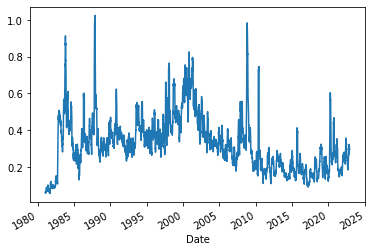

In [13]:
# plot
rs = rogers_satchell(data).plot();
rs

# Save the figure.
plt.savefig("./Images/rs.jpg")

# Yang-Zhang

Yang-Zhang volatility is the combination of the overnight (close-to-open volatility), a weighted average of the Rogers-Satchell volatility and the day’s open-to-close volatility.

In [14]:
def yang_zhang(price_data, window=30, trading_periods=252, clean=True):

    log_ho = (price_data["High"] / price_data["Open"]).apply(np.log)
    log_lo = (price_data["Low"] / price_data["Open"]).apply(np.log)
    log_co = (price_data["Close"] / price_data["Open"]).apply(np.log)

    log_oc = (price_data["Open"] / price_data["Close"].shift(1)).apply(np.log)
    log_oc_sq = log_oc ** 2

    log_cc = (price_data["Close"] / price_data["Close"].shift(1)).apply(np.log)
    log_cc_sq = log_cc ** 2

    rs = log_ho * (log_ho - log_co) + log_lo * (log_lo - log_co)

    close_vol = log_cc_sq.rolling(window=window, center=False).sum() * (
        1.0 / (window - 1.0)
    )
    open_vol = log_oc_sq.rolling(window=window, center=False).sum() * (
        1.0 / (window - 1.0)
    )
    window_rs = rs.rolling(window=window, center=False).sum() * (1.0 / (window - 1.0))

    k = 0.34 / (1.34 + (window + 1) / (window - 1))
    result = (open_vol + k * close_vol + (1 - k) * window_rs).apply(
        np.sqrt
    ) * math.sqrt(trading_periods)

    if clean:
        return result.dropna()
    else:
        return result

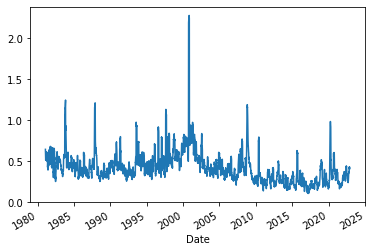

In [15]:
# plot
yz = yang_zhang(data).plot();
yz

# Save the figure.
plt.savefig("./Images/yz.jpg")